<a href="https://colab.research.google.com/github/Brunolts01/segmentacao-de-cliente-kmeans/blob/main/segmentacao_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise RFV e Segmentação de Clientes Usando K-means

Um dos maiores desafios de uma empresa é conseguir entender os clientes que ela possui e como é o comportamento dos mesmos. Há clientes que compram com mais frequência, outros com menos porém com valor maior. Entender as particulades de **cada um** é o que trará os melhores resultados no longo prazo. Para isso nasceu a *Análise RFV*, que nada mais é do que um método para entender a Recência, a Frequência e o Valor monetário que é movimentado pelo cliente ao decorrer do tempo. Junto a essa técnica podemos clusterizar a nossa carteira em grupos menores visando agrupar os perfis parecidos no mesmo lugar. Assim poderemos realizar campanhas direcionadas para o público correto.

<p align=center>

<img src="https://leads2b.com/blog/wp-content/uploads/2021/03/blog_segmentacao-de-cliente.png" width="60%"></p>

Na primeira parte desse projeto iremos fazer uma breve análise RFV e depois clusterizar nossos clientes usando o algoritmo k-means.

## 1.0 Introdução

### 1.1 Importação de bibliotecas necessários

In [ ]:
# Importando bibliotecas

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings

filterwarnings('ignore')
sns.set_style('darkgrid')

### 1.2 Importação do arquivo

In [ ]:
## Importação do arquivo

# Conectando ao drive
from google.colab import drive
drive.mount('/content/drive')

# Importando arquivo
data_path = '/content/drive/MyDrive/PROJETOS_DS/segmentacao-de-clientes/Online Retail.csv'
df = pd.read_csv(data_path, encoding='1252', parse_dates=['InvoiceDate'])

Mounted at /content/drive


## 2.0 Análise de dados

Iremos começar a análisar os nossos dados a fim de entender as variáveis do mesmo e como elas irão impactar no nosso modelo posterior de clusterização.

In [ ]:
# Verificando primeiras linhas

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [ ]:
# Verificando últimas linhas

df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,09-12-2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,09-12-2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,09-12-2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,09-12-2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,09-12-2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


###### Descricação das colunas:
InvoiceNo: id único para cada compra

StockCode: Código do estoque

Description: Descrição do produto

Quantity: Quantidade de produtos comprados

InvoiceDate: Data da compra

UnitPrice: Preço por unidade de produto

CustomerID: Identificador do cliente

Country: País do comprador

In [ ]:
# Verificando dimensões

linhas = df.shape[0]
colunas = df.shape[1]

print(f"O arquivo possui {colunas} colunas e {linhas} linhas")

O arquivo possui 8 colunas e 541909 linhas


In [ ]:
# Verificando info do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# Valores nulos

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Valores duplicados

df.duplicated().sum()

5268

In [ ]:
# Visualizando valores duplicados

df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,09-12-2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,09-12-2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,09-12-2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,09-12-2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Verificando um exemplo de valor duplicado

df.query("InvoiceNo == '536409' and StockCode == '21866' and Description  == 'UNION JACK FLAG LUGGAGE TAG' ")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom


In [ ]:
df[(df['InvoiceNo'] == '536409') & (df['StockCode'] == '21866') & (df['Description'] == 'UNION JACK FLAG LUGGAGE TAG')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom


In [ ]:
# Tipos de dados

df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Há alguns tipos de dados que precisam sem tratados, como **CustomerID** e **InvoiceDate**. Vamos ajustar os mesmos para os tipos corretos.

Vamos aproveitar e criar uma nova coluna chamada total, que será o resultado de Quantity * UnitPrice, ou seja, o valor totla da compra.

In [ ]:
# Tratando colunas

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d-%m-%Y %H:%M")
df['CustomerID'] = df['CustomerID'].astype('object').apply(lambda x: str(x).replace('.', ''))

In [ ]:
# Criando nova coluna

df['Total'] = df['UnitPrice'] * df['Quantity']

In [ ]:
# Verificando tipos novamente

df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Total                 float64
dtype: object

In [ ]:
# Verificando dataset com a nova coluna

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,178500,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,178500,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,178500,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,178500,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,178500,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,178500,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,178500,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,178500,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,178500,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,130470,United Kingdom,54.08


In [ ]:
# Describe do dataset

df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
Total,541909.0,17.987795,-168469.6,3.4,9.75,17.4,168469.6,378.810824


Além de valores nulos em algumas colunas, temos valores negativos em **Quantity**, **UnitPrice** e **Total**, os mesmos serão excluídos.

Há também linhas duplicadas no nosso dataset, vamos excluir as mesmas. Optei por manter o último registro *(keep = 'last')* mas poderíamos usar outras opções.

Os registros onde a coluna **CustomerID** forem nulos também iremos excluir, uma vez que não faz sentido classificarmos um cliente que não sabemos quem é.


In [ ]:
# Retirando valores negativos e valores nulos

df = df.query("Quantity > 0 and UnitPrice > 0 and Total > 0")
df = df[df['CustomerID'] != np.nan]

In [ ]:
# Retirando valores duplicados

df.drop_duplicates(keep='last', inplace=True)

In [ ]:
# Verificando novamente o dataset

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Total          0
dtype: int64

In [ ]:
# Verificando valores duplicados novamente

df.duplicated().sum()

0

In [ ]:
# Verificando describe novamente

df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,524878.0,10.6166,1.0,1.0,4.0,11.0,80995.0,156.280031
InvoiceDate,524878,2011-07-04 15:30:16.317049088,2010-12-01 08:26:00,2011-03-28 12:13:00,2011-07-20 11:22:00,2011-10-19 11:41:00,2011-12-09 12:50:00,NaN
UnitPrice,524878.0,3.922573,0.001,1.25,2.08,4.13,13541.33,36.093028
Total,524878.0,20.275399,0.001,3.9,9.92,17.7,168469.6,271.693566


Antes de continuarmos iremos plotar alguns gráficos para entendermos melhor se há ou não a presenção de outliers na base.

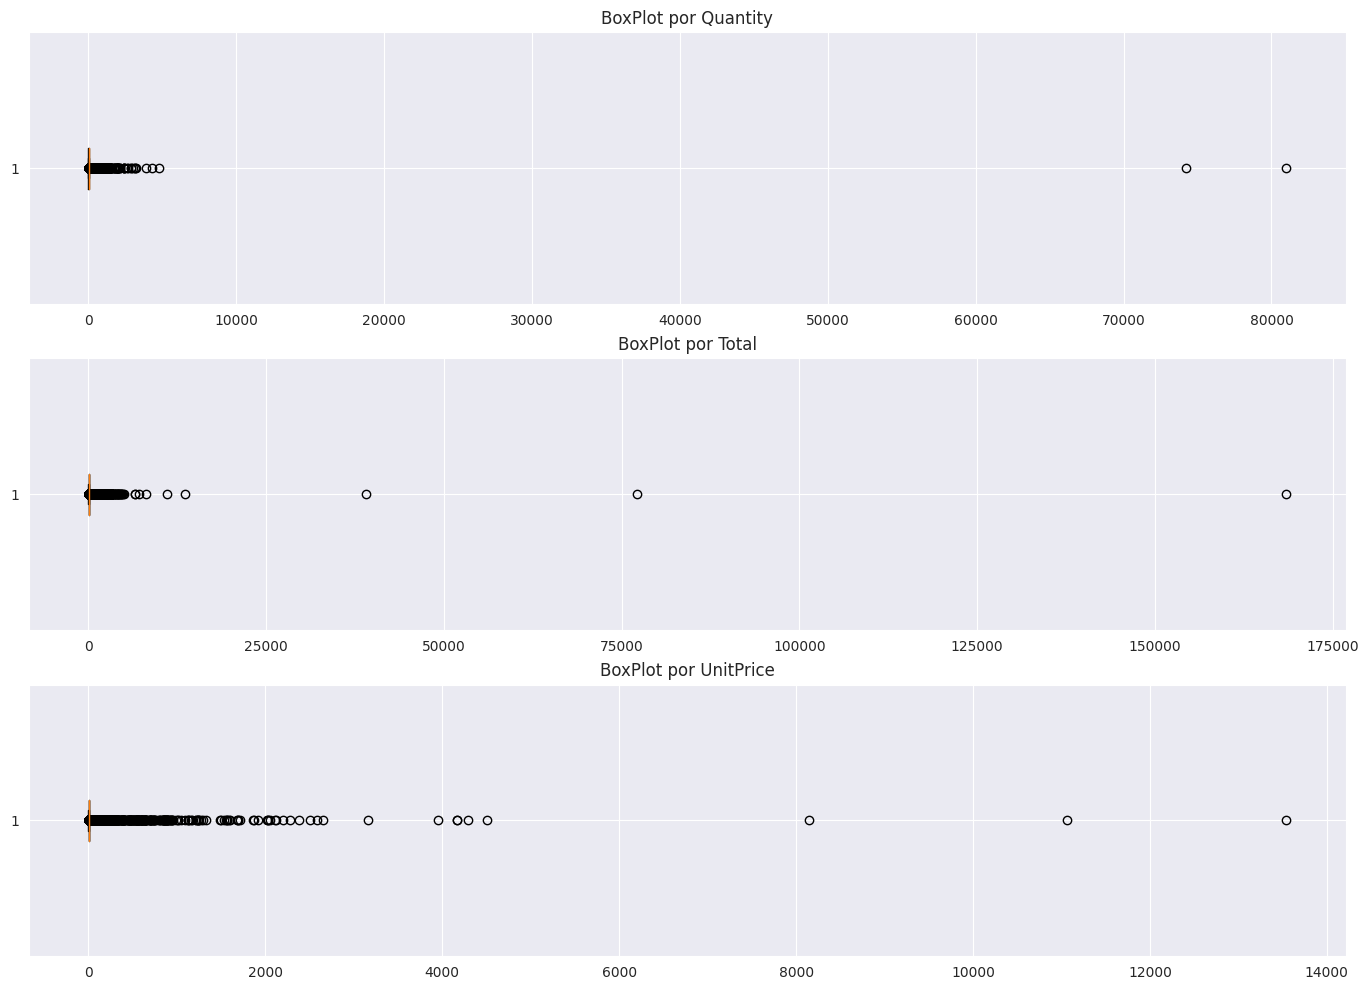

In [ ]:
# Plotando gráficos para detectar outliers

plt.figure(figsize=(17,12))
plt.subplot(3, 1, 1)
plt.boxplot(df['Quantity'], vert=False)
plt.title("BoxPlot por Quantity")

plt.subplot(3, 1, 2)
plt.boxplot(df['Total'], vert=False)
plt.title("BoxPlot por Total")

plt.subplot(3, 1, 3)
plt.boxplot(df['UnitPrice'], vert=False)
plt.title("BoxPlot por UnitPrice")


plt.show()

Há outliers para Quantity e Total, iremos retirar os mesmos para que não prejudiquem o nosso modelo.

In [ ]:
# Retirando valores altos

df = df.query("Quantity <= 2000 and Total <= 4000 and UnitPrice <= 3500")

In [ ]:
# Verificando novas dimensões do dataset

df.shape

(524841, 9)

Dado que exploramos as principais características da nossa base e excluímos os valores inválidos, podemos prosseguir com a nossa modelagem de clusters.

Antes disso, é preciso que calculemos a Recência, Frequência e Valor, iremos agrupar os dados para que isso seja possível.

A recência nesse caso será calculada em meses, mas poderia ser calculada em semanas, dias, anos, irá depender da necessidade e característica de cada negócio. Vamos achar a data mais recente do dataset e calcular a diferença com alguma data fictícia, apenas para referência.


In [ ]:
# Última data dos dados

df['InvoiceDate'].sort_values(ascending=False).head(1)

541908   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [ ]:
# Criando data para calcular diferença

import datetime as dt

dia_referencia = dt.datetime(2012, 2, 3)
dia_referencia

datetime.datetime(2012, 2, 3, 0, 0)

In [ ]:
# Criando novo dataset

df_rfv = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (dia_referencia - x.max()).days / 30,
    'InvoiceNo': 'count',
    'Total': 'sum'
}).rename(columns = {
    'InvoiceDate': 'Recencia',
    'InvoiceNo': 'Frequencia',
    'Total': 'Valor'
})

# Visualizando
print(f"Total de linhas: {df_rfv.shape[0]}")
df_rfv.head()

Total de linhas: 4337


,Recencia,Frequencia,Valor
CustomerID,,,
123470,1.900000,182,4310.00
123480,4.333333,31,1797.24
123490,2.433333,73,1757.55
123500,12.166667,17,334.40
123520,3.033333,85,2506.04


In [ ]:
# Verificando propriedades do novo dataset agrupado

df_rfv.describe().T

,count,mean,std,min,25%,50%,75%,max
Recencia,4337.0,4.901184,3.331787,1.833333,2.40,3.50,6.533333,1.426667e+01
Frequencia,4337.0,121.014757,2018.388301,1.000000,17.00,41.00,98.000000,1.321810e+05
Valor,4337.0,2356.680324,27349.647725,2.900000,306.13,668.43,1649.500000,1.716724e+06


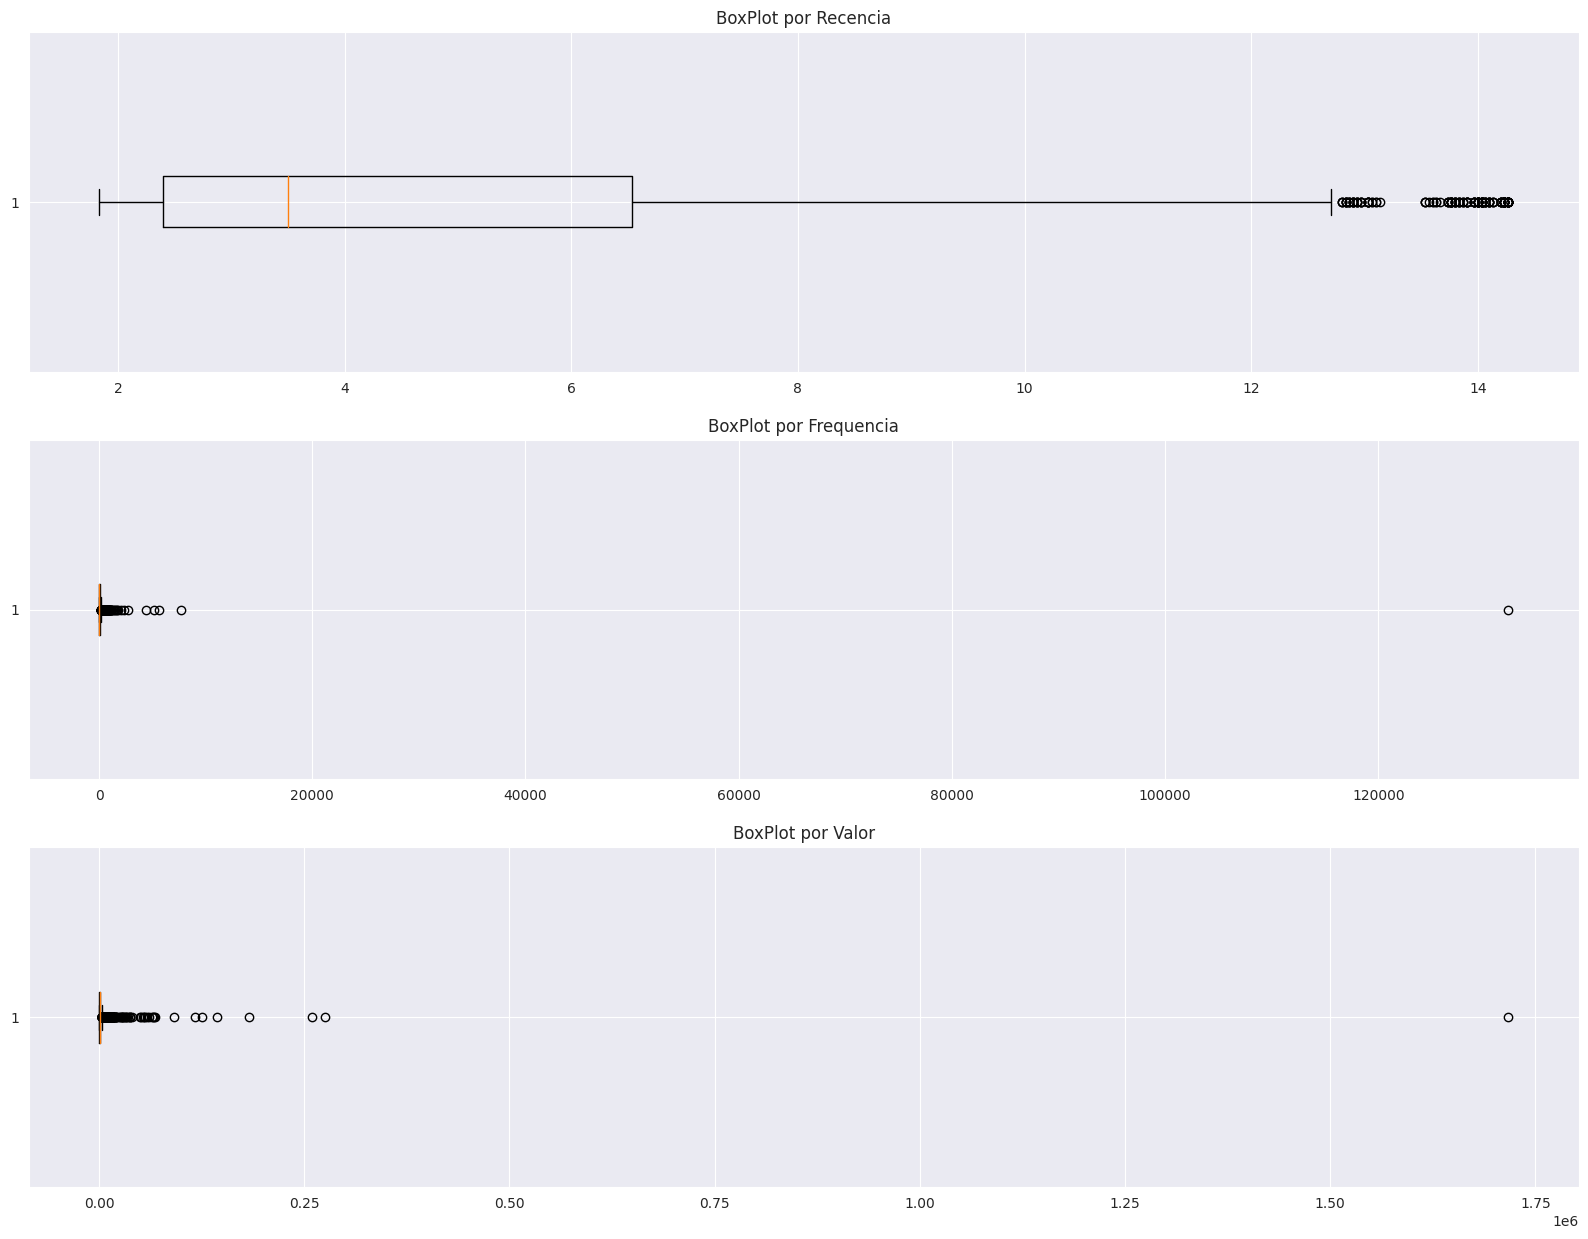

In [ ]:
# Entendendo valores do novodaset

plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.boxplot(df_rfv['Recencia'], vert=False)
plt.title("BoxPlot por Recencia")

plt.subplot(3, 1, 2)
plt.boxplot(df_rfv['Frequencia'], vert=False)
plt.title("BoxPlot por Frequencia")

plt.subplot(3, 1, 3)
plt.boxplot(df_rfv['Valor'], vert=False)
plt.title("BoxPlot por Valor")

plt.show()

Temos outliers na nossa tabela agrupada. Vamos retirar os mesmos e seguir para o modelo.

In [ ]:
# Novo dataset sem outliers
df_rfv = df_rfv.query('Frequencia < 1500 and Valor < 37500')
print(f"Total de linhas: {df_rfv.shape[0]}")

Total de linhas: 4313


## 3.0 Aplicação do K-Means

O K-Means é um algoritmo de clusterização que agrupa os dados em k clusters (grupos) distintos com base na proximidade dos pontos de dados a centroides aleatoriamente inicializados.

Para aplicação do mesmo, se faz necessário padronizar os dados, faremos isso nas próximas etapas.

Além disso, para medir a eficácia dos nossos clusters iremos usar duas métricas de avaliação a **Elbow Method** e a **Silhouette Score**.

**Elbow Method**: O Método do Cotovelo (Elbow Method) ajuda a determinar o número ótimo de clusters em algoritmos de clusterização ao encontrar o ponto onde a soma das distâncias quadradas dentro dos clusters começa a diminuir lentamente, formando um "cotovelo" no gráfico.

**Silhouette Score**: O Silhouette Score mede a qualidade da clusterização avaliando o quão semelhante um ponto é ao seu próprio cluster (cohesão) comparado aos outros clusters. O valor varia de -1 a 1, onde valores altos indicam que os pontos estão bem agrupados e bem separados de outros clusters.

In [ ]:
# Padronizando os dados

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_rfv_scaled = scaler.fit_transform()
df_rfv_scaled

array([[-0.90502559,  0.85014418,  1.02539229],
       [-0.1751106 , -0.42675531,  0.1040963 ],
       [-0.74504422, -0.07159121,  0.08954408],
       ...,
       [-0.85503141, -0.58742478, -0.4895749 ],
       [-0.89502675,  5.40808341,  0.19513109],
       [-0.50507217, -0.09696008,  0.11877685]])

In [ ]:
# Avaliação da quantidade de cluster usando as métricas

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = {}
silhouette_coefficients = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=10)
  kmeans.fit(df_rfv_scaled)
  sse[k] = kmeans.inertia_
  score = silhouette_score(df_rfv_scaled, kmeans.labels_)
  silhouette_coefficients.append(score)

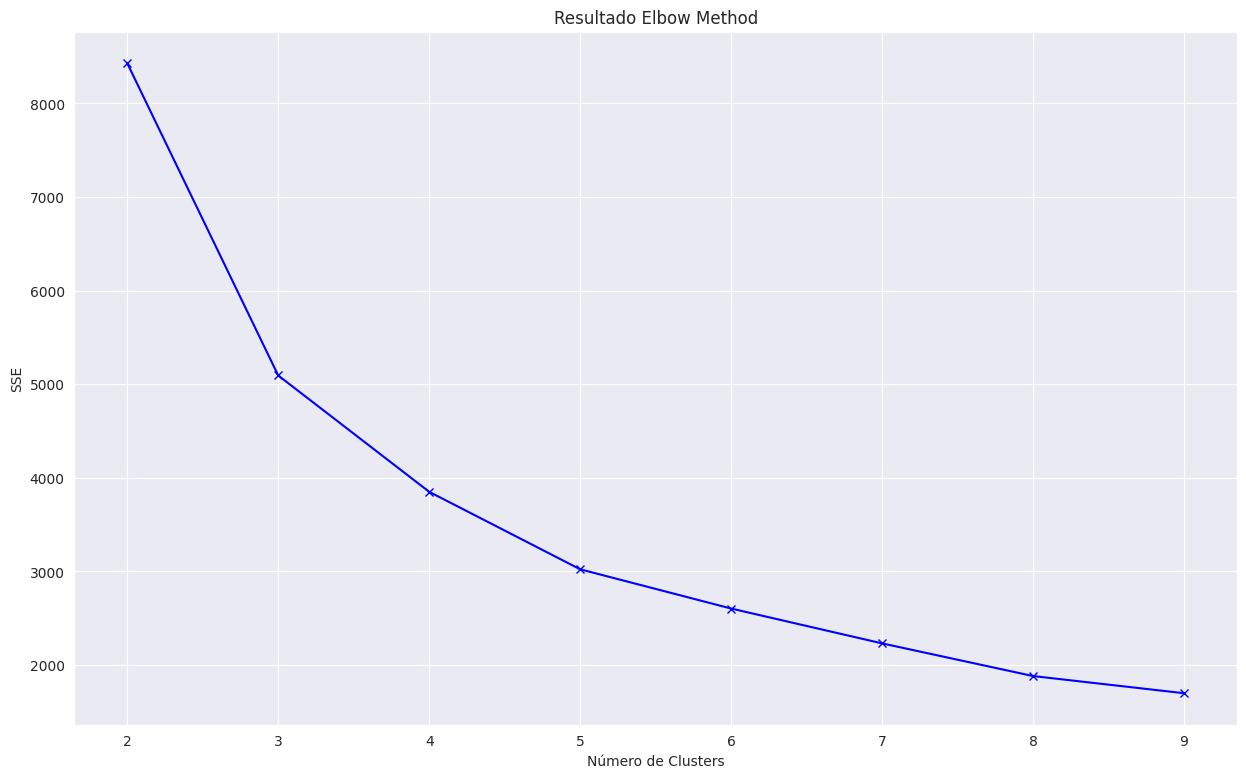

In [ ]:
# Plotando resultados do método Elbow

plt.figure(figsize=(15,9))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.title("Resultado Elbow Method")
plt.xlabel("Número de Clusters")
plt.ylabel("SSE")
plt.show()

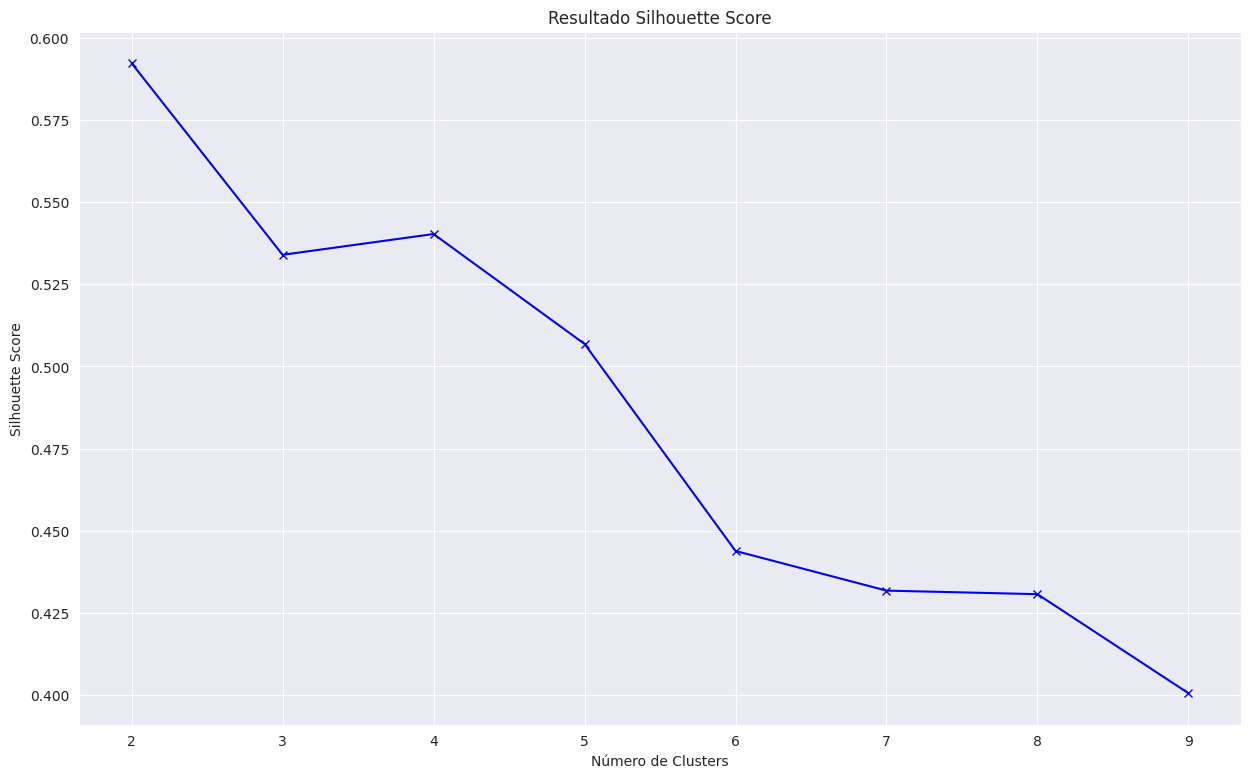

In [ ]:
# Plotando resultados do Silhouette Score

plt.figure(figsize=(15,9))
plt.plot(range(2, 10), silhouette_coefficients, 'bx-')
plt.title("Resultado Silhouette Score")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Pelo que vimos o número ideal de clusters para esse nosso conjuntos de dados é **3**. Vamos seguir com esse número para o nosso modelo então.

In [ ]:
# Processo definitivo com 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(df_rfv_scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

In [ ]:
# Colocando cluster de cada cliente

df_rfv['Cluster'] = kmeans.labels_
df_rfv.head()

,Recencia,Frequencia,Valor,Cluster
CustomerID,,,,
123470,1.900000,182,4310.00,0
123480,4.333333,31,1797.24,0
123490,2.433333,73,1757.55,0
123500,12.166667,17,334.40,1
123520,3.033333,85,2506.04,0


Vamos agrupar nossos Clusters pela média das variáveis e entender o que cada um significa agora.

In [ ]:
# Cria dataframe agrupado
df_rfv_agrupado = df_rfv.groupby('Cluster').agg({
    'Cluster': 'count',
    'Recencia': 'mean',
    'Frequencia': 'mean',
    'Valor': 'mean'
}).rename(columns = {
    'Cluster': 'Total Clientes',
    'Recencia': 'Media_Recencia',
    'Frequencia': 'Media_Frequencia',
    'Valor': 'Media_Valor'
})

# Exibe novo df agrupado
df_rfv_agrupado

,Total Clientes,Media_Recencia,Media_Frequencia,Media_Valor
Cluster,,,,
0,2932,3.316439,68.095839,1188.040567
1,1059,10.112622,26.084986,445.256469
2,322,2.404969,385.347826,7987.927267


Pelo que analisamos nos cluster é possível entender que:

Cluster 0: Recência Baixa e Frequência Média (Bons Clientes)

Cluster 1: Recência Alta e Frequencia Baixa (Clientes de possível churn (cancelamento)

Cluster 2: Recência Baixa, Alta Frequência e Alto Valor (Clientes Vip)

Vamos criar um novo dataset tirando a coluna CustomerID como index. Depois, dado que entendemos o perfil de cada cluster vamos substituir o valor da coluna por algo mais descritivo.

In [ ]:
# Resetando index
df_rfv_new = df_rfv.reset_index()
df_rfv_new

,CustomerID,Recencia,Frequencia,Valor,Cluster
0,123470,1.900000,182,4310.00,0
1,123480,4.333333,31,1797.24,0
2,123490,2.433333,73,1757.55,0
3,123500,12.166667,17,334.40,1
4,123520,3.033333,85,2506.04,0
...,...,...,...,...,...
4308,182800,11.066667,10,180.60,1
4309,182810,7.833333,7,80.82,1
4310,182820,2.066667,12,178.05,0
4311,182830,1.933333,721,2045.53,2


In [ ]:
# Dicionário de Clusters
dict_clusters = {0: 'Bons Clientes', 1: 'Possível Churn', 2: 'Clientes VIP'}

In [ ]:
# Substituindo valores
df_rfv_new['Cluster'] = df_rfv_new['Cluster'].replace(dict_clusters)

In [ ]:
# Visualizando novo df
df_rfv_new

,CustomerID,Recencia,Frequencia,Valor,Cluster
0,123470,1.900000,182,4310.00,Bons Clientes
1,123480,4.333333,31,1797.24,Bons Clientes
2,123490,2.433333,73,1757.55,Bons Clientes
3,123500,12.166667,17,334.40,Possível Churn
4,123520,3.033333,85,2506.04,Bons Clientes
...,...,...,...,...,...
4308,182800,11.066667,10,180.60,Possível Churn
4309,182810,7.833333,7,80.82,Possível Churn
4310,182820,2.066667,12,178.05,Bons Clientes
4311,182830,1.933333,721,2045.53,Clientes VIP


Finalizamos por aqui nosso projeto. A intenção final dele é que a equipe responsável por vendas possa aproveitar a clusterização e direcionar melhor as ações de marketing a fim de atingir os melhores resultados.

Cruzando essa base com a base cadastral da empresa poderíamos coletar os e-mails dos clientes e fazer as ações assertivas para cada perfil.